Generation = 1
Fitness    = 1756.4821151694082
Change     = 1756.4821151694082
Generation = 2
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 3
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 4
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 5
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 6
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 7
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 8
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 9
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 10
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 11
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 12
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 13
Fitness    = 1756.4821151694082
Change     = 0.0
Generation = 14
Fitness    = 4222.7422627006345
Change     = 2466.2601475312263
Generation = 15
Fitness    = 4222.7422627006345
Change     = 0.0
Gene

No handles with labels found to put in legend.



Fitness    = 213590.50084963272
Change     = 0.0
Generation = 171
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 172
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 173
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 174
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 175
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 176
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 177
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 178
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 179
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 180
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 181
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 182
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 183
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 184
Fitness    = 213590.50084963272
Change     = 0.0
Generation = 185
Fitness  

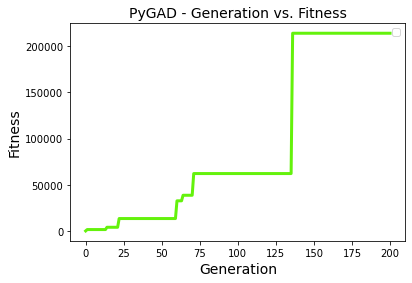

No handles with labels found to put in legend.


Parameters of the best solution : [0.128673 0.740329 0.481217 0.182972 0.028061 0.776893 0.668216 0.841256
 0.479293 0.343872 0.194717]
Fitness value of the best solution = 213590.50084963272
Index of the best solution : 0
Predicted output based on the best solution : -0.6485803618561501
Best fitness value reached after 136 generations.


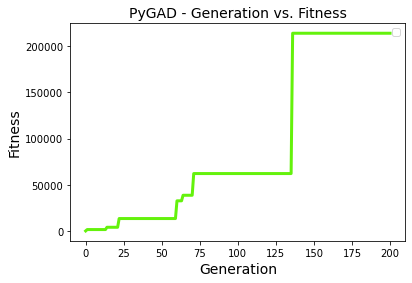

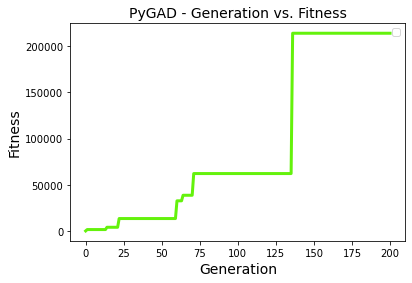

In [1]:
import pygad
import numpy

"""
Given the following polynomiyal function:
What are the best values for the 11 features? We are going to use the genetic algorithm to optimize this function.
R_th = -0.90923445*N + 0.76458764*N2 - 0.05384331*R_h + 0.05825483*R_h2 - 0.03672348*R_v + 0.02117113*R_v2 - 0.10114099*R_l
+ 0.04460771*R_l2 -0.50917129*R_w + 0.23977468*R_w2 + 0.64857668
"""

function_inputs = [-1,-0.90923445,0.76458764,-0.05384331,0.05825483,-0.03672348,0.02117113,-0.10114099,0.04460771,-0.50917129,0.23977468] # Function inputs.
desired_output = -0.64857668 # Function output.

def fitness_func(ga_instance, solution, solution_idx):
    output = numpy.sum(solution*function_inputs)
    fitness = 1.0 / (numpy.abs(output - desired_output) + 0.000001)
    return fitness

num_generations = 200 # Number of generations.
num_parents_mating = 12 # Number of solutions to be selected as parents in the mating pool.

sol_per_pop = 12 # Number of solutions in the population.
num_genes = len(function_inputs)

init_range_low = -1
init_range_high = 1

parent_selection_type = "sss"
keep_parents = 12

crossover_type = "uniform"

mutation_type = "random"
mutation_percent_genes = 20
last_fitness = 0

gene_space = [{'low': 0.12, 'high': 0.14}, {'low': 0.65, 'high': 0.75}, {'low': 0.48, 'high': 0.50}, {'low': 0.18, 'high': 0.20},
             {'low': 0.02, 'high': 0.05}, {'low': 0.76, 'high': 0.80},{'low': 0.50, 'high': 0.70}, {'low': 0.83, 'high': 0.85},
             {'low': 0.40, 'high': 0.60}, {'low': 0.30, 'high': 0.40},{'low': 0.05, 'high': 0.25}]

gene_type=[float, 6]


def on_generation(ga_instance):
    global last_fitness
    print(f"Generation = {ga_instance.generations_completed}")
    print(f"Fitness    = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]}")
    print(f"Change     = {ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness}")
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

    
ga_instance = pygad.GA(num_generations=num_generations,
                       init_range_low=init_range_low,
                       init_range_high=init_range_high,
                       num_parents_mating=num_parents_mating,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       fitness_func=fitness_func,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_percent_genes=mutation_percent_genes,
                       on_generation=on_generation,
                       gene_space=gene_space,
                       gene_type=gene_type)

# Running the GA to optimize the parameters of the function.
ga_instance.run()

ga_instance.plot_fitness()

# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

prediction = numpy.sum(numpy.array(function_inputs)*solution)
print(f"Predicted output based on the best solution : {prediction}")

if ga_instance.best_solution_generation != -1:
    print(f"Best fitness value reached after {ga_instance.best_solution_generation} generations.")

# Saving the GA instance.
filename = 'genetic' # The filename to which the instance is saved. The name is without extension.
ga_instance.save(filename=filename)

# Loading the saved GA instance.
loaded_ga_instance = pygad.load(filename=filename)
loaded_ga_instance.plot_fitness()